In [57]:
import scipy.io.wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [127]:
import os


dir_containing_file = r'\\poseidon.meca.polymtl.ca\lis\Private\Arijit Mandal\04_Masters Research\Experiments\Blood pressure measurement pulse rate measurement using pvdf film\with and without support'

# 👇️ change to directory containing file
os.chdir(dir_containing_file)
print(os.getcwd())

\\poseidon.meca.polymtl.ca\lis\Private\Arijit Mandal\04_Masters Research\Experiments\Blood pressure measurement pulse rate measurement using pvdf film\with and without support


In [59]:
os.listdir()

['2023_3_28_after ex 1.png',
 '2023_3_28_after ex 1.txt',
 '2023_3_28_after ex 2.png',
 '2023_3_28_after ex 2.txt',
 '2023_3_28_after ex 3.png',
 '2023_3_28_after ex 3.txt',
 '2023_3_28_after ex 4.png',
 '2023_3_28_after ex 4.txt',
 '2023_3_28_bedore ex 1.png',
 '2023_3_28_bedore ex 1.txt',
 '2023_3_28_bedore ex 2.png',
 '2023_3_28_bedore ex 2.txt',
 '2023_3_28_bedore ex 3.png',
 '2023_3_28_bedore ex 3.txt',
 '2023_3_28_bedore ex 4.png',
 '2023_3_28_bedore ex 4.txt',
 '2023_3_28_bedore ex 5.png',
 '2023_3_28_bedore ex 5.txt',
 '2023_3_28_save_files(path_txt, path_plot, seconds).png',
 '2023_3_28_save_files(path_txt, path_plot, seconds).txt',
 '2023_3_28_with s 1.png',
 '2023_3_28_with s 1.txt',
 '2023_3_28_without s 1.png',
 '2023_3_28_without s 1.txt',
 '2023_3_28_without s 2.png',
 '2023_3_28_without s 2.txt',
 '2023_3_28_without s green strap 2.png',
 '2023_3_28_without s green strap 2.txt',
 '2023_3_28_without s green strap.png',
 '2023_3_28_without s green strap.txt',
 'peak_stati

In [126]:
Data=np.genfromtxt("2023_3_28_after ex 3.txt",delimiter=',',skip_header=10000, skip_footer=1000)

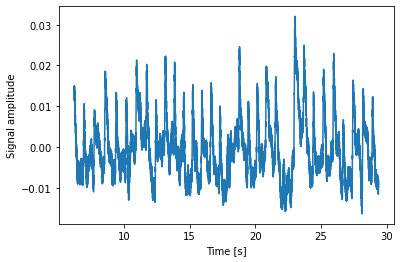

In [124]:
t = Data[:,0]
x = Data[:,1]

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

In [129]:
y=t[2]-t[1]
f_s=1/y
print(f_s)
fs=1609

1609.1917030057666


In [ ]:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
#ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_xlim(0,2)
ax.set_ylim(-5, 1000)
#ax.axis([0.5, 1.5, 15, 20]) 

In [ ]:
# Define the frequency range of interest
f_min = 0.5 # Hz
f_max = 10 # Hz

# Create a filter that attenuates the frequencies outside the range of interest
filter = np.logical_and(freqs >= f_min, freqs <= f_max).astype(int)

# Apply the filter to the frequency-domain representation of the signal
X_filtered = X * filter

# Compute the inverse FFT of the filtered signal
x_filtered = np.fft.ifft(X_filtered).real

# Plot the original and filtered signals
plt.figure()
plt.plot(t, x, label='Original signal')
plt.plot(t, x_filtered, label='Filtered signal')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
plt.plot(t, x_filtered, label='Filtered signal')

Top Peaks: [0.01502482 0.00917578 0.01858161 0.01342062 0.02134133 0.02027604
 0.02227753 0.02086258 0.0134482  0.01530179 0.01581062 0.01001171
 0.0245823  0.01563642 0.01981734 0.01723936 0.0320631  0.02499964
 0.01906162 0.02297811 0.00674442 0.01642347 0.01424277]
Bottom Peaks: [-0.0098101  -0.01094557 -0.00947673 -0.00907192 -0.01299342 -0.01309494
 -0.01354236 -0.00679221 -0.01194819 -0.01161607 -0.01025627 -0.01423416
 -0.00386707 -0.00998932 -0.00729227 -0.0152794  -0.01576817 -0.01007454
 -0.00972738 -0.00840768 -0.01322277 -0.01636849 -0.0093301 ]
Peak to Peak amplitudes: [0.02483492 0.02012135 0.02805834 0.02249254 0.03433475 0.03337098
 0.03581989 0.02765479 0.02539639 0.02691786 0.02606689 0.02424587
 0.02844937 0.02562574 0.02710961 0.03251876 0.04783127 0.03507418
 0.028789   0.03138579 0.01996719 0.03279196 0.02357287]


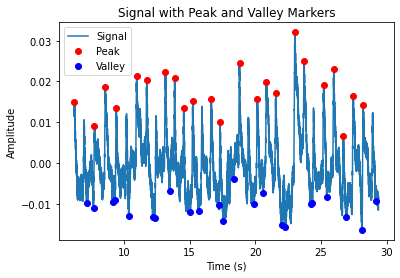

In [130]:
# Divide the signal into 1-second segments
segment_size = fs # Number of samples per segment
num_segments = len(x) // segment_size
x_segments = np.reshape(x[:num_segments*segment_size], (num_segments, segment_size))

# Calculate the peak amplitudes of each segment
max_amplitudes = np.max(x_segments, axis=1)
min_amplitudes = np.min(x_segments, axis=1)
# peak_amplitudes = np.maximum(np.abs(max_amplitudes), np.abs(min_amplitudes))
peak_amplitudes = np.max(x_segments, axis=1) - np.min(x_segments, axis=1)

# Plot the signal and mark the peaks
fig, ax = plt.subplots()
ax.plot(t, x, label='Signal')
for i in range(num_segments):
    start = i * segment_size / fs
    end = (i + 1) * segment_size / fs
    max_peak = np.argmax(x_segments[i])
    min_peak = np.argmin(x_segments[i])
    ax.plot(t[i*segment_size + max_peak], x[i*segment_size + max_peak], 'ro', label='Peak' if i==0 else None)
    ax.plot(t[i*segment_size + min_peak], x[i*segment_size + min_peak], 'bo', label='Valley' if i==0 else None)
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Signal with Peak and Valley Markers')

# Print the peak amplitudes
print('Top Peaks:',max_amplitudes)
print('Bottom Peaks:',min_amplitudes)
print('Peak to Peak amplitudes:', peak_amplitudes)


In [114]:
# stack the arrays horizontally
result = np.hstack((max_amplitudes.reshape(-1, 1), min_amplitudes.reshape(-1, 1), peak_amplitudes.reshape(-1, 1)))

# ask user to input a file name
file_name = input("Enter a file name to save the arrays: ")

# define column headers
headers = "Top Peaks,Bottom Peaks,Peak to Peak amplitudes"  #add txt at the end of the file name

# save the arrays to a file
np.savetxt(file_name, result, delimiter=",",header=headers, comments="")

Enter a file name to save the arrays: After Ex 3.txt
